In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

In [2]:
## Reading the dataset

In [3]:
df_train=pd.read_csv("Titanic_train.csv")
df_test=pd.read_csv("Titanic_test.csv")
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
## Performing EDA in training dataset

In [6]:
df_train.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
mode1=df_train["Cabin"].mode()
mode1

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [9]:
mode2=df_train["Embarked"].mode()
mode2

0    S
Name: Embarked, dtype: object

In [10]:
mean=df_train["Age"].mean().round()
mean

30.0

In [11]:
df_train.fillna({"Age":mean,"Cabin":mode1[2],"Embarked":mode2[0]},inplace=True)


In [12]:
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [13]:
df_train.duplicated().any()

False

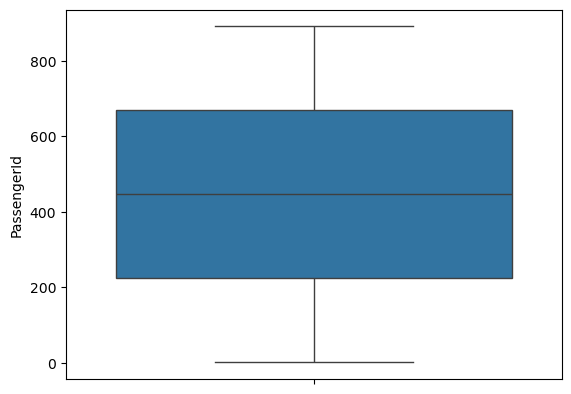

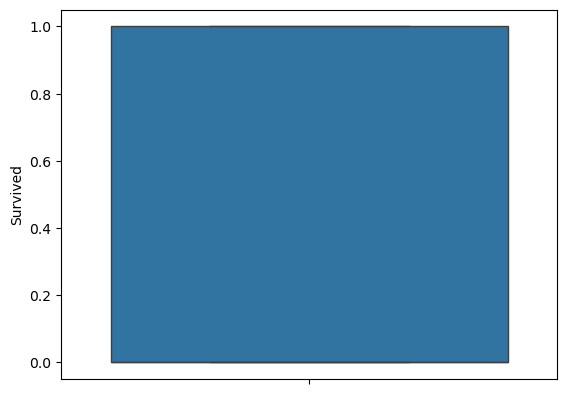

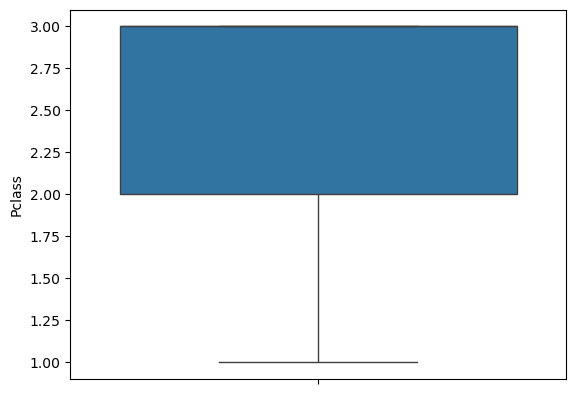

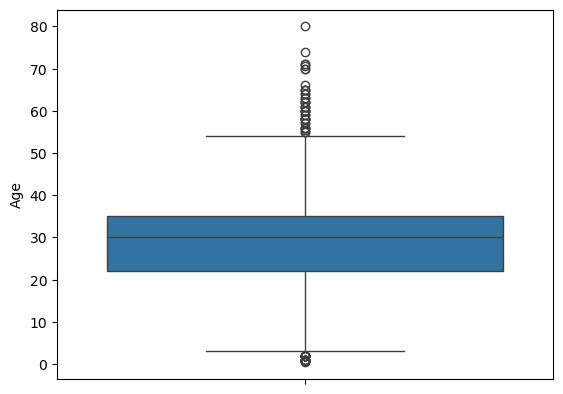

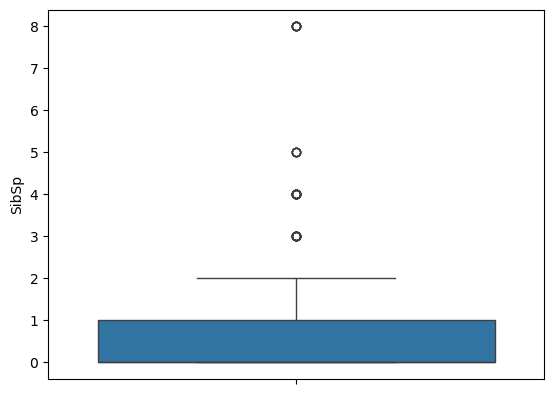

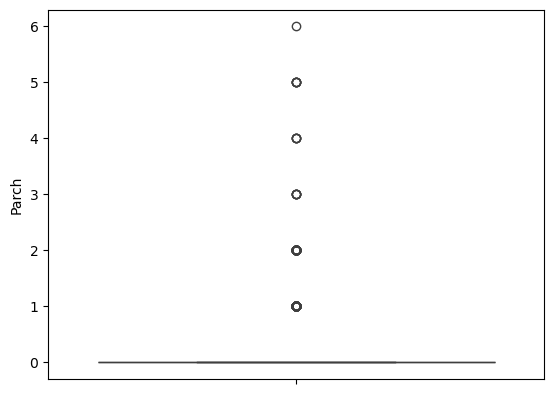

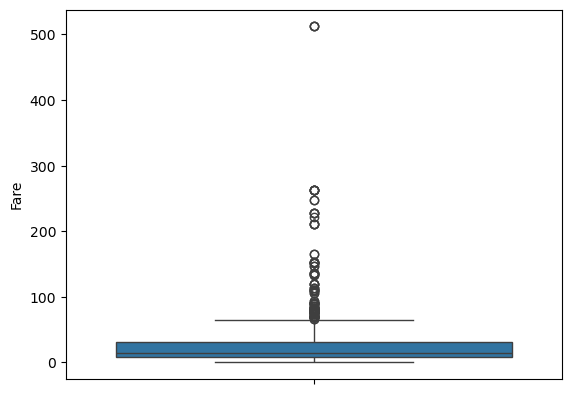

In [14]:
for i in df_train._get_numeric_data():
    sns.boxplot(y=df_train[i])
    plt.ylabel(i)     
    plt.show()

In [15]:
Q1 = df_train.select_dtypes(include=[np.number]).quantile(0.25)  
Q3 = df_train.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_train.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (df_train.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

print("Number of outliers in each column:\n", outliers.sum()) 

Number of outliers in each column:
 PassengerId      0
Survived         0
Pclass           0
Age             66
SibSp           46
Parch          213
Fare           116
dtype: int64


In [16]:
df_train_cleaned = df_train.drop(index=outliers.any(axis=1)[outliers.any(axis=1)].index)
df_train_cleaned.reset_index(inplace=True)
df_train_cleaned

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
2,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S
4,5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,G6,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,G6,S
573,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G6,S
574,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
575,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


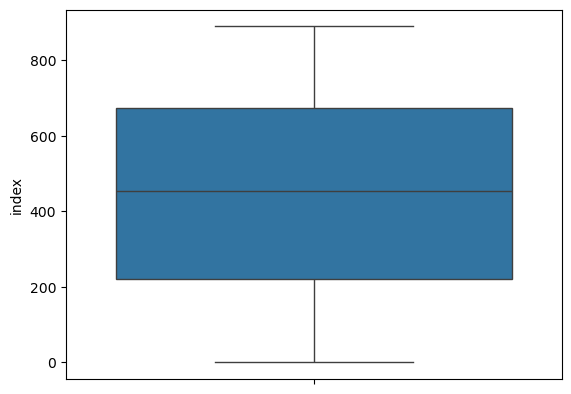

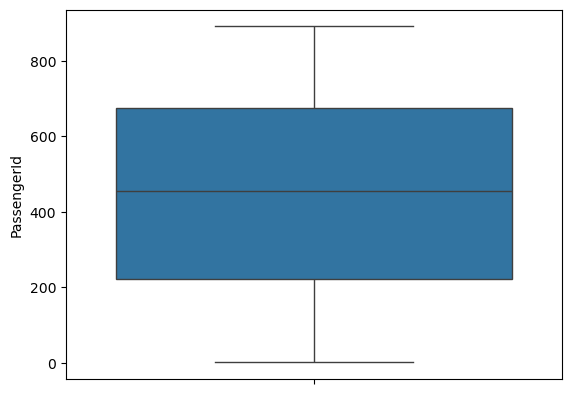

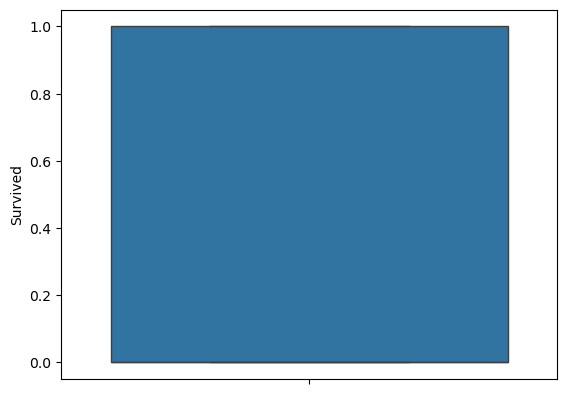

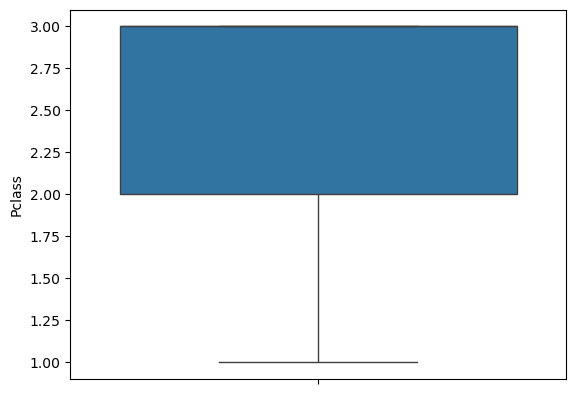

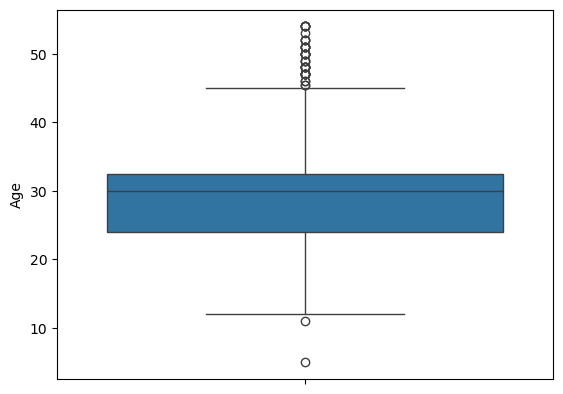

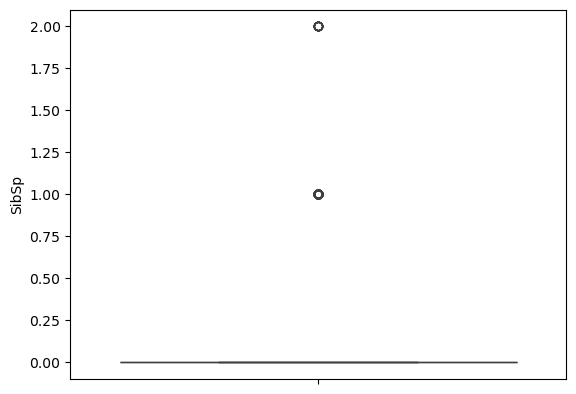

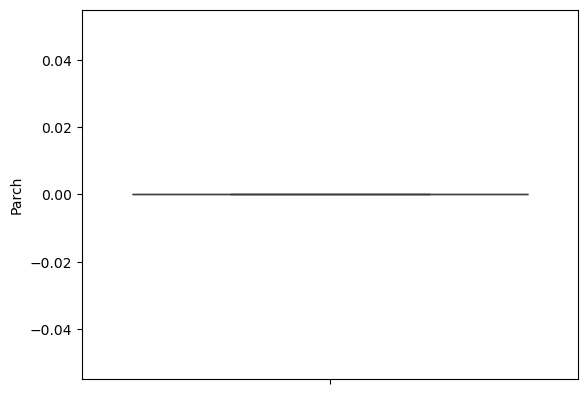

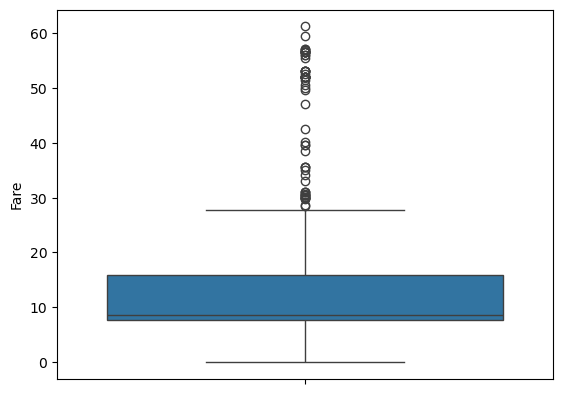

In [17]:
for i in df_train_cleaned._get_numeric_data():
    sns.boxplot(y=df_train_cleaned[i])
    plt.ylabel(i)     
    plt.show()

## EDA on testing dataset

In [19]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [20]:
mode1=df_test["Cabin"].mode()
mode1

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [21]:
mode2=df_test["Embarked"].mode()
mode2

0    S
Name: Embarked, dtype: object

In [22]:
mean1=df_test["Age"].mean().round()
mean1

30.0

In [23]:
mean2=df_test["Fare"].mean().round()
mean2

36.0

In [24]:
df_test.fillna({"Age":mean,"Cabin":mode1[0][1],"Embarked":mode2[0],"Fare":mean2},inplace=True)

In [25]:
df_test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [26]:
df_test.duplicated().any()

False

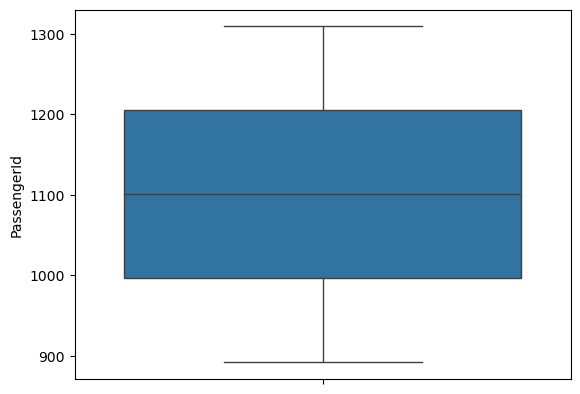

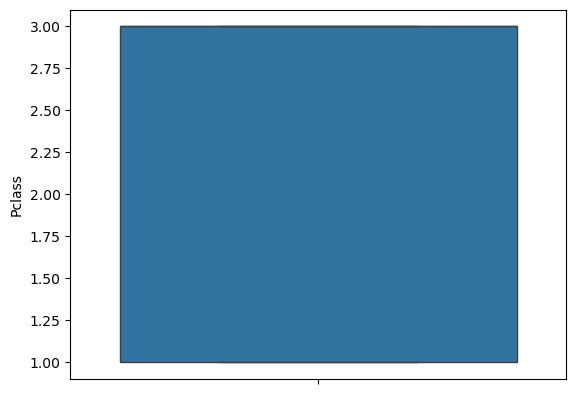

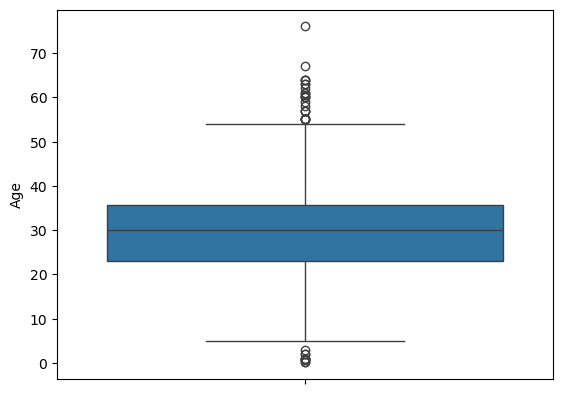

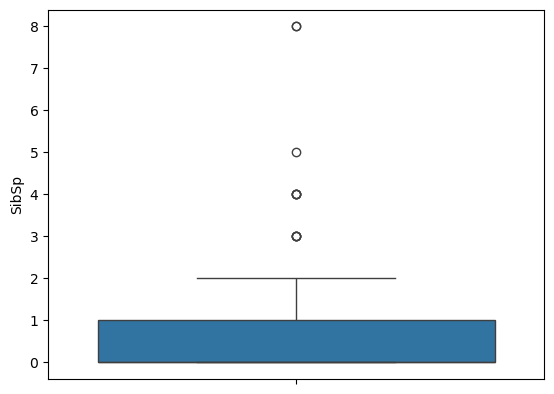

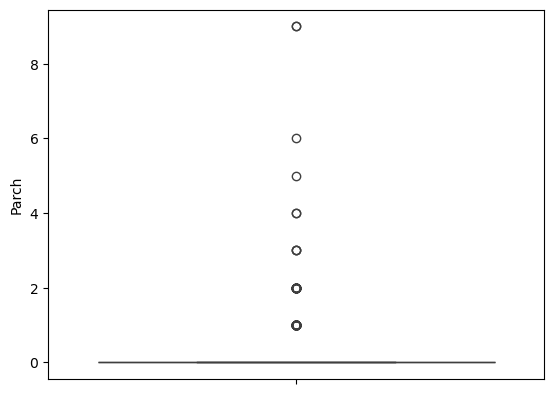

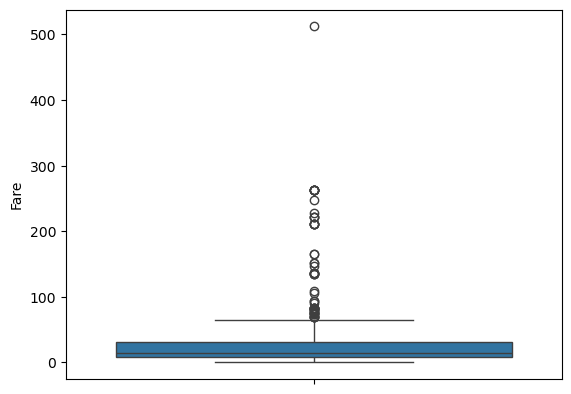

In [27]:
for i in df_test._get_numeric_data():
    sns.boxplot(y=df_test[i])
    plt.ylabel(i)     
    plt.show()

In [28]:
Q1 = df_test.select_dtypes(include=[np.number]).quantile(0.25)  
Q3 = df_test.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_test.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (df_test.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

print("Number of outliers in each column:\n", outliers.sum()) 

Number of outliers in each column:
 PassengerId     0
Pclass          0
Age            36
SibSp          11
Parch          94
Fare           55
dtype: int64


In [29]:
df_test_cleaned = df_test.drop(index=outliers.any(axis=1)[outliers.any(axis=1)].index)
df_test_cleaned.reset_index(inplace=True)
df_test_cleaned

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,5,Q
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,5,S
2,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,5,S
3,5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,5,S
4,6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,5,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
276,410,1302,3,"Naughton, Miss. Hannah",female,30.0,0,0,365237,7.7500,5,Q
277,412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,5,S
278,413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,5,S
279,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,5,S


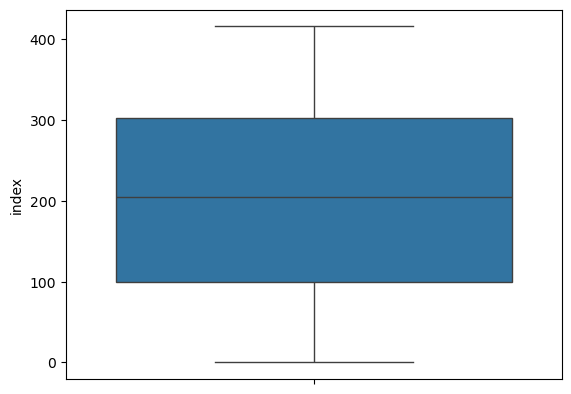

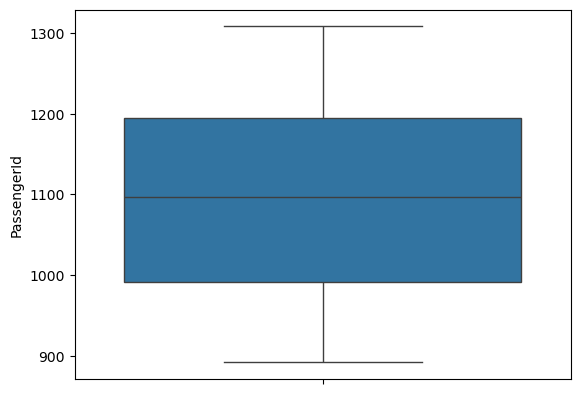

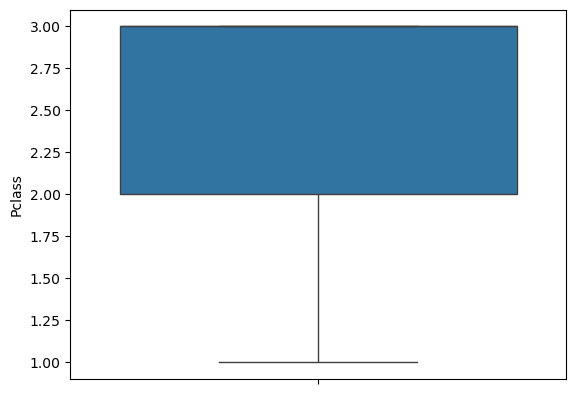

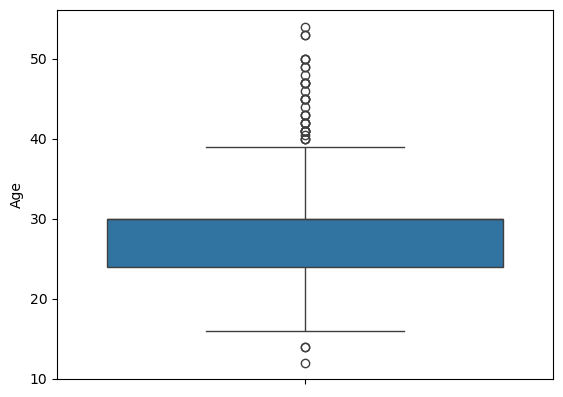

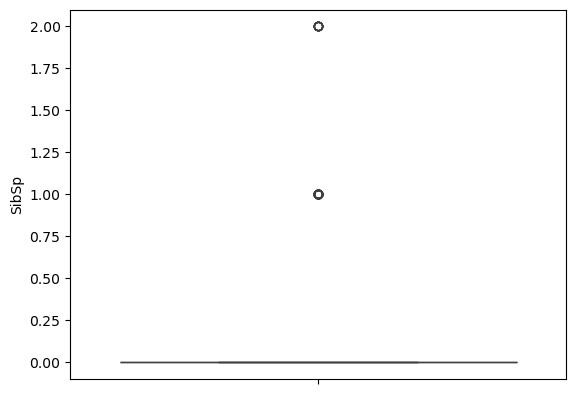

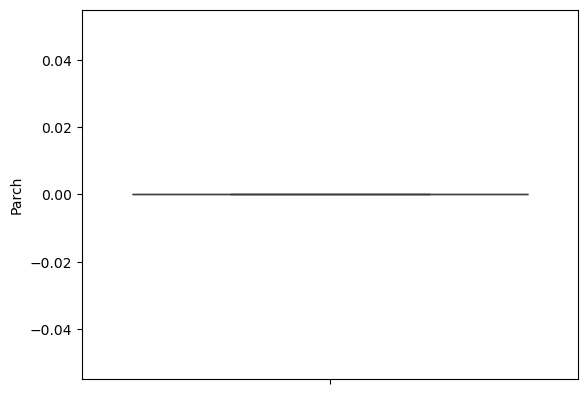

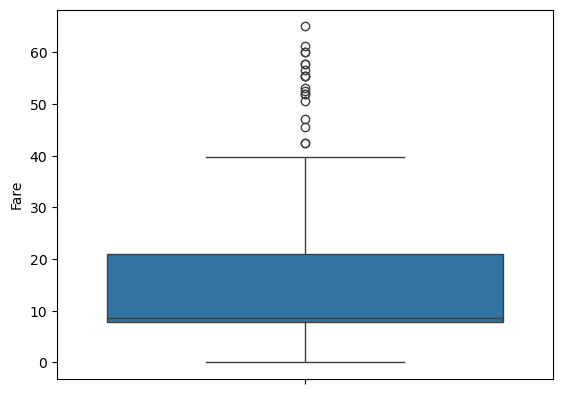

In [30]:
for i in df_test_cleaned._get_numeric_data():
    sns.boxplot(y=df_test_cleaned[i])
    plt.ylabel(i)     
    plt.show()

## Correlation of Training dataset and testing dataset

In [32]:
df_test_cleaned.drop(columns="index",inplace=True)
df_test_cleaned

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,5,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,5,S
2,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,5,S
3,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,5,S
4,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,5,Q
...,...,...,...,...,...,...,...,...,...,...,...
276,1302,3,"Naughton, Miss. Hannah",female,30.0,0,0,365237,7.7500,5,Q
277,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,5,S
278,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,5,S
279,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,5,S


In [33]:
df_test=df_test_cleaned.copy()
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,5,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,5,S
2,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,5,S
3,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,5,S
4,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,5,Q
...,...,...,...,...,...,...,...,...,...,...,...
276,1302,3,"Naughton, Miss. Hannah",female,30.0,0,0,365237,7.7500,5,Q
277,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,5,S
278,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,5,S
279,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,5,S


In [34]:
df_train_cleaned.drop(columns="index",inplace=True)
df_train_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S
4,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,G6,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
572,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,G6,S
573,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G6,S
574,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
575,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
df_train=df_train_cleaned.copy()
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S
4,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,G6,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
572,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,G6,S
573,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G6,S
574,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
575,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
num_train=df_train._get_numeric_data()
num_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,3,1,3,26.0,0,0,7.9250
2,4,1,1,35.0,1,0,53.1000
3,5,0,3,35.0,0,0,8.0500
4,6,0,3,30.0,0,0,8.4583
...,...,...,...,...,...,...,...
572,885,0,3,25.0,0,0,7.0500
573,887,0,2,27.0,0,0,13.0000
574,888,1,1,19.0,0,0,30.0000
575,890,1,1,26.0,0,0,30.0000


In [37]:
cat_train=df_train.drop(columns=num_train)
cat_train

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,G6,S
1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,G6,S
2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
3,"Allen, Mr. William Henry",male,373450,G6,S
4,"Moran, Mr. James",male,330877,G6,Q
...,...,...,...,...,...
572,"Sutehall, Mr. Henry Jr",male,SOTON/OQ 392076,G6,S
573,"Montvila, Rev. Juozas",male,211536,G6,S
574,"Graham, Miss. Margaret Edith",female,112053,B42,S
575,"Behr, Mr. Karl Howell",male,111369,C148,C


In [38]:
num_test=df_test._get_numeric_data()
num_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,895,3,27.0,0,0,8.6625
3,897,3,14.0,0,0,9.2250
4,898,3,30.0,0,0,7.6292
...,...,...,...,...,...,...
276,1302,3,30.0,0,0,7.7500
277,1304,3,28.0,0,0,7.7750
278,1305,3,30.0,0,0,8.0500
279,1307,3,38.5,0,0,7.2500


In [39]:
cat_test=df_test.drop(columns=num_test)
cat_test

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,5,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,5,S
2,"Wirz, Mr. Albert",male,315154,5,S
3,"Svensson, Mr. Johan Cervin",male,7538,5,S
4,"Connolly, Miss. Kate",female,330972,5,Q
...,...,...,...,...,...
276,"Naughton, Miss. Hannah",female,365237,5,Q
277,"Henriksson, Miss. Jenny Lovisa",female,347086,5,S
278,"Spector, Mr. Woolf",male,A.5. 3236,5,S
279,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,5,S


In [40]:
corr=num_train.corr()

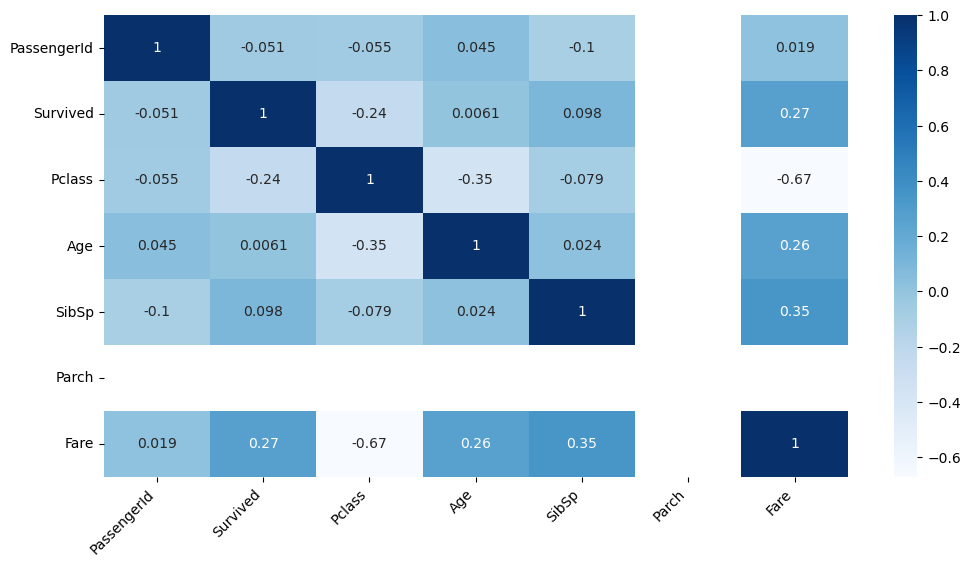

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
## Since parch have unique value we can drop it

In [43]:
df_train.drop(columns="Parch",inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,G6,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,G6,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,G6,S
4,6,0,3,"Moran, Mr. James",male,30.0,0,330877,8.4583,G6,Q
...,...,...,...,...,...,...,...,...,...,...,...
572,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,SOTON/OQ 392076,7.0500,G6,S
573,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,211536,13.0000,G6,S
574,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,B42,S
575,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,111369,30.0000,C148,C


In [44]:
corr=num_test.corr()

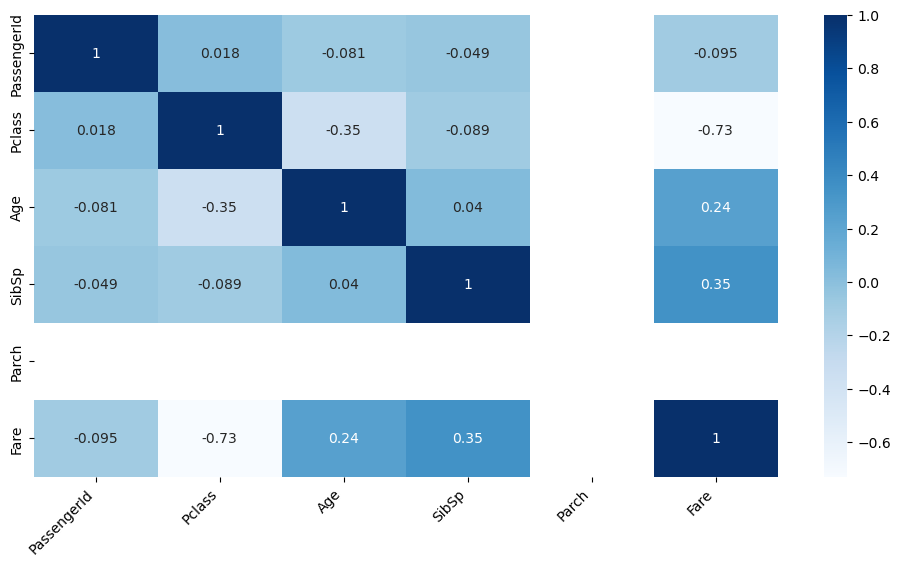

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
df_test.drop(columns="Parch",inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,330911,7.8292,5,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,363272,7.0000,5,S
2,895,3,"Wirz, Mr. Albert",male,27.0,0,315154,8.6625,5,S
3,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,7538,9.2250,5,S
4,898,3,"Connolly, Miss. Kate",female,30.0,0,330972,7.6292,5,Q
...,...,...,...,...,...,...,...,...,...,...
276,1302,3,"Naughton, Miss. Hannah",female,30.0,0,365237,7.7500,5,Q
277,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,347086,7.7750,5,S
278,1305,3,"Spector, Mr. Woolf",male,30.0,0,A.5. 3236,8.0500,5,S
279,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,SOTON/O.Q. 3101262,7.2500,5,S


# Visualization

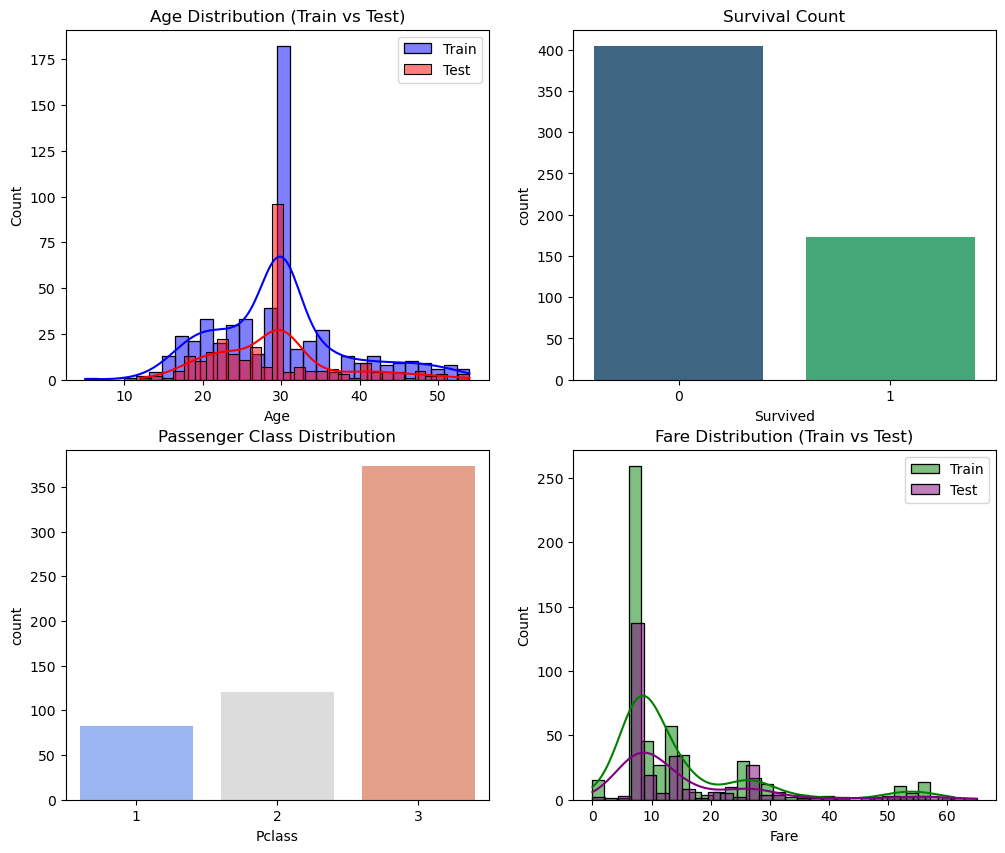

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df_train["Age"].dropna(), bins=30, kde=True, ax=axes[0, 0], color="blue", label="Train")
sns.histplot(df_test["Age"].dropna(), bins=30, kde=True, ax=axes[0, 0], color="red", label="Test")
axes[0, 0].set_title("Age Distribution (Train vs Test)")
axes[0, 0].legend()
sns.countplot(x="Survived", data=df_train, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Survival Count")
sns.countplot(x="Pclass", data=df_train, ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title("Passenger Class Distribution")
sns.histplot(df_train["Fare"].dropna(), bins=30, kde=True, ax=axes[1, 1], color="green", label="Train")
sns.histplot(df_test["Fare"].dropna(), bins=30, kde=True, ax=axes[1, 1], color="purple", label="Test")
axes[1, 1].set_title("Fare Distribution (Train vs Test)")
axes[1, 1].legend()

## Encoding

## Label encoding on training dataset

In [51]:
la=LabelEncoder()

In [52]:
df_train["Embarked"]=la.fit_transform(df_train["Embarked"])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,G6,2
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,G6,2
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,2
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,G6,2
4,6,0,3,"Moran, Mr. James",male,30.0,0,330877,8.4583,G6,1
...,...,...,...,...,...,...,...,...,...,...,...
572,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,SOTON/OQ 392076,7.0500,G6,2
573,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,211536,13.0000,G6,2
574,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,B42,2
575,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,111369,30.0000,C148,0


In [53]:
df_train["Sex"]=la.fit_transform(df_train["Sex"])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,A/5 21171,7.2500,G6,2
1,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,STON/O2. 3101282,7.9250,G6,2
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,113803,53.1000,C123,2
3,5,0,3,"Allen, Mr. William Henry",1,35.0,0,373450,8.0500,G6,2
4,6,0,3,"Moran, Mr. James",1,30.0,0,330877,8.4583,G6,1
...,...,...,...,...,...,...,...,...,...,...,...
572,885,0,3,"Sutehall, Mr. Henry Jr",1,25.0,0,SOTON/OQ 392076,7.0500,G6,2
573,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,211536,13.0000,G6,2
574,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,112053,30.0000,B42,2
575,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,111369,30.0000,C148,0


# Label enconding on testing dataset

In [55]:
df_test["Sex"]=la.fit_transform(df_test["Sex"])

In [56]:
df_test["Embarked"]=la.fit_transform(df_test["Embarked"])
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,330911,7.8292,5,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,363272,7.0000,5,2
2,895,3,"Wirz, Mr. Albert",1,27.0,0,315154,8.6625,5,2
3,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,7538,9.2250,5,2
4,898,3,"Connolly, Miss. Kate",0,30.0,0,330972,7.6292,5,1
...,...,...,...,...,...,...,...,...,...,...
276,1302,3,"Naughton, Miss. Hannah",0,30.0,0,365237,7.7500,5,1
277,1304,3,"Henriksson, Miss. Jenny Lovisa",0,28.0,0,347086,7.7750,5,2
278,1305,3,"Spector, Mr. Woolf",1,30.0,0,A.5. 3236,8.0500,5,2
279,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,SOTON/O.Q. 3101262,7.2500,5,2


In [57]:
df_train.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)
df_test.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.0,1,7.2500,2
1,1,3,0,26.0,0,7.9250,2
2,1,1,0,35.0,1,53.1000,2
3,0,3,1,35.0,0,8.0500,2
4,0,3,1,30.0,0,8.4583,1
...,...,...,...,...,...,...,...
572,0,3,1,25.0,0,7.0500,2
573,0,2,1,27.0,0,13.0000,2
574,1,1,0,19.0,0,30.0000,2
575,1,1,1,26.0,0,30.0000,0


In [58]:
df_test

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,34.5,0,7.8292,1
1,3,0,47.0,1,7.0000,2
2,3,1,27.0,0,8.6625,2
3,3,1,14.0,0,9.2250,2
4,3,0,30.0,0,7.6292,1
...,...,...,...,...,...,...
276,3,0,30.0,0,7.7500,1
277,3,0,28.0,0,7.7750,2
278,3,1,30.0,0,8.0500,2
279,3,1,38.5,0,7.2500,2


## Splitting the dataset amd model building

In [60]:
x_train=df_train.iloc[:,1:]
x_train

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,22.0,1,7.2500,2
1,3,0,26.0,0,7.9250,2
2,1,0,35.0,1,53.1000,2
3,3,1,35.0,0,8.0500,2
4,3,1,30.0,0,8.4583,1
...,...,...,...,...,...,...
572,3,1,25.0,0,7.0500,2
573,2,1,27.0,0,13.0000,2
574,1,0,19.0,0,30.0000,2
575,1,1,26.0,0,30.0000,0


In [61]:
y_train=pd.DataFrame(df_train.iloc[:,0])
y_train

,Survived
0,0
1,1
2,1
3,0
4,0
...,...
572,0
573,0
574,1
575,1


In [62]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [63]:
x_test=df_test
x_test

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1,34.5,0,7.8292,1
1,3,0,47.0,1,7.0000,2
2,3,1,27.0,0,8.6625,2
3,3,1,14.0,0,9.2250,2
4,3,0,30.0,0,7.6292,1
...,...,...,...,...,...,...
276,3,0,30.0,0,7.7500,1
277,3,0,28.0,0,7.7750,2
278,3,1,30.0,0,8.0500,2
279,3,1,38.5,0,7.2500,2


In [64]:
print("Unique values in y_train:", np.unique(y_train))

Unique values in y_train: [0 1]


In [65]:
log_reg=LogisticRegression(max_iter=1000, random_state=42, multi_class="auto")

In [66]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [67]:
log_reg.predict_proba(x_val)

array([[0.68663156, 0.31336844],
       [0.40810851, 0.59189149],
       [0.38938472, 0.61061528],
       [0.8696634 , 0.1303366 ],
       [0.87268652, 0.12731348],
       [0.40810851, 0.59189149],
       [0.9250374 , 0.0749626 ],
       [0.30981902, 0.69018098],
       [0.87835678, 0.12164322],
       [0.89888064, 0.10111936],
       [0.66193941, 0.33806059],
       [0.91966811, 0.08033189],
       [0.87101224, 0.12898776],
       [0.72718796, 0.27281204],
       [0.32058994, 0.67941006],
       [0.38684407, 0.61315593],
       [0.31695775, 0.68304225],
       [0.27241477, 0.72758523],
       [0.87327277, 0.12672723],
       [0.82536078, 0.17463922],
       [0.31986381, 0.68013619],
       [0.89003663, 0.10996337],
       [0.89942294, 0.10057706],
       [0.8528927 , 0.1471073 ],
       [0.88390281, 0.11609719],
       [0.88724349, 0.11275651],
       [0.8892079 , 0.1107921 ],
       [0.90299904, 0.09700096],
       [0.06824957, 0.93175043],
       [0.8528927 , 0.1471073 ],
       [0.

In [68]:
y_predict=log_reg.predict(x_val)
y_predict

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
print("Accuracy:", accuracy_score(y_val, y_predict))
print("Classification Report:\n", classification_report(y_val, y_predict))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_predict))

Accuracy: 0.8189655172413793
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88        87
           1       0.63      0.66      0.64        29

    accuracy                           0.82       116
   macro avg       0.76      0.76      0.76       116
weighted avg       0.82      0.82      0.82       116

Confusion Matrix:
 [[76 11]
 [10 19]]


In [70]:
proba=log_reg.predict_proba(x_val)[:,1]
proba

array([0.31336844, 0.59189149, 0.61061528, 0.1303366 , 0.12731348,
       0.59189149, 0.0749626 , 0.69018098, 0.12164322, 0.10111936,
       0.33806059, 0.08033189, 0.12898776, 0.27281204, 0.67941006,
       0.61315593, 0.68304225, 0.72758523, 0.12672723, 0.17463922,
       0.68013619, 0.10996337, 0.10057706, 0.1471073 , 0.11609719,
       0.11275651, 0.1107921 , 0.09700096, 0.93175043, 0.1471073 ,
       0.65193487, 0.34589719, 0.09585379, 0.10181536, 0.09164819,
       0.11416026, 0.85074256, 0.56266351, 0.13669851, 0.86720552,
       0.10474307, 0.08081741, 0.11374925, 0.08644614, 0.12808898,
       0.0860652 , 0.1164612 , 0.13506203, 0.41548723, 0.12326401,
       0.1034218 , 0.68998079, 0.12222528, 0.49863773, 0.17805637,
       0.10181536, 0.08546535, 0.61675681, 0.17225302, 0.07531915,
       0.11594728, 0.14708122, 0.1496453 , 0.29757965, 0.1469665 ,
       0.61034553, 0.73936341, 0.35103264, 0.15568026, 0.10057706,
       0.73374408, 0.11857197, 0.16153761, 0.70087583, 0.10181

In [71]:
fpr,tpr,thr=roc_curve(y_val,proba)
print(fpr,tpr,thr)

[0.         0.         0.         0.01149425 0.01149425 0.02298851
 0.02298851 0.04597701 0.04597701 0.05747126 0.05747126 0.09195402
 0.09195402 0.12643678 0.12643678 0.16091954 0.16091954 0.24137931
 0.25287356 0.25287356 0.28735632 0.32183908 0.44827586 0.45977011
 0.47126437 0.47126437 0.59770115 0.59770115 0.70114943 0.75862069
 0.7816092  0.79310345 0.8045977  0.97701149 0.97701149 1.        ] [0.         0.03448276 0.10344828 0.10344828 0.37931034 0.37931034
 0.44827586 0.44827586 0.51724138 0.51724138 0.55172414 0.55172414
 0.62068966 0.62068966 0.65517241 0.65517241 0.75862069 0.75862069
 0.79310345 0.82758621 0.82758621 0.82758621 0.82758621 0.86206897
 0.86206897 0.89655172 0.89655172 0.93103448 0.93103448 0.93103448
 0.93103448 0.93103448 0.96551724 0.96551724 1.         1.        ] [       inf 0.93175043 0.85074256 0.79957661 0.68998079 0.68304225
 0.67941006 0.62702654 0.61441755 0.61315593 0.61061528 0.60041222
 0.59189149 0.55452981 0.54272189 0.35103264 0.31336844 0.17

In [72]:
auc_score=roc_auc_score(y_val,proba)
auc_score1=round(auc_score,2)
auc_score1

0.83

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


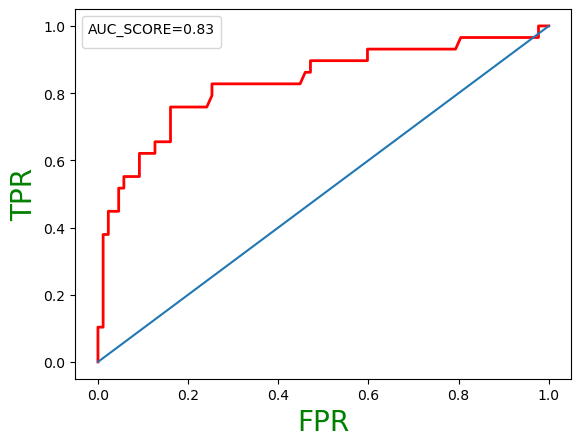

In [73]:
plt.plot(fpr,tpr,color="red",linewidth=2)
plt.legend(title=f"AUC_SCORE={auc_score1}",loc="best")
plt.xlabel("FPR",size=20,color="green")
plt.ylabel("TPR",size=20,color="green")
plt.plot([0,1])

In [74]:
## Based on the test dataset predicting the y value 

In [75]:
y_test=log_reg.predict(x_test)
y_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [76]:
y_test=pd.DataFrame(y_test)
y_test

,0
0,0
1,0
2,0
3,0
4,1
...,...
276,1
277,1
278,0
279,0


In [77]:
df_test=df_test.join(y_test)
df_test

,Pclass,Sex,Age,SibSp,Fare,Embarked,0
0,3,1,34.5,0,7.8292,1,0
1,3,0,47.0,1,7.0000,2,0
2,3,1,27.0,0,8.6625,2,0
3,3,1,14.0,0,9.2250,2,0
4,3,0,30.0,0,7.6292,1,1
...,...,...,...,...,...,...,...
276,3,0,30.0,0,7.7500,1,1
277,3,0,28.0,0,7.7750,2,1
278,3,1,30.0,0,8.0500,2,0
279,3,1,38.5,0,7.2500,2,0


In [78]:
df_test.rename(columns={0:"Survived"},inplace=True)
df_test

,Pclass,Sex,Age,SibSp,Fare,Embarked,Survived
0,3,1,34.5,0,7.8292,1,0
1,3,0,47.0,1,7.0000,2,0
2,3,1,27.0,0,8.6625,2,0
3,3,1,14.0,0,9.2250,2,0
4,3,0,30.0,0,7.6292,1,1
...,...,...,...,...,...,...,...
276,3,0,30.0,0,7.7500,1,1
277,3,0,28.0,0,7.7750,2,1
278,3,1,30.0,0,8.0500,2,0
279,3,1,38.5,0,7.2500,2,0


## Deployment

In [79]:
from pickle import dump

In [80]:
with open('logreg_model.pkl', 'wb') as f:
    dump(log_reg, f)